In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import scipy.stats as stats

In [2]:
df=pd.read_excel(r"C:\Users\pbann\OneDrive\Desktop\nox_analysis).xlsx")

In [3]:
df

,TIME,DUST,LOAD,SOX,COAL FLOW,AIR FLOW,APH A INLET O2,Unnamed: 7,APH B OULET O2,Unnamed: 9,APH OUTLET TEMPERATURE,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,NOX,APH OUTLET TEMP-PASSA,APH OUTLET TEMP-PASSB
0,NaT,NaN,NaN,NaN,NaN,NaN,PASS A,PASS B,PASS A,PASS B,PASS A,NaN,NaN,PASS B,NaN,NaN,NaN,NaN,NaN
1,2022-09-17 11:58:45,90.80,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.952588,133.905731,127.929764,124.646881,141.678818,127.929764,124.646881,669.0,128.827459,131.418488
2,2022-09-17 12:08:45,44.00,193.337067,1905.0,139.956100,782.0,4.643019,4.294496,5.754969,5.510434,134.193665,128.137390,124.994049,143.860413,128.137390,124.994049,782.0,129.108368,132.330617
3,2022-09-17 12:18:45,44.90,191.797440,1866.0,139.279434,773.0,4.615278,4.364353,5.611253,5.564438,137.087982,131.028625,127.897293,145.354401,131.028625,127.897293,758.0,132.004634,134.760106
4,2022-09-17 12:28:45,40.12,191.705933,1870.0,140.341476,768.0,4.522539,4.274601,5.575839,5.455734,136.559753,130.804092,127.554688,144.051025,130.804092,127.554688,740.0,131.639511,134.136602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2022-09-19 16:58:45,202.00,280.991913,1602.0,224.756393,1058.0,2.609954,2.855597,3.70673,3.681844,153.206329,146.571167,141.583771,162.793274,146.571167,141.583771,620.0,147.120422,150.316071
320,2022-09-19 17:08:45,202.00,281.414917,1602.0,224.468277,1065.0,2.553551,2.744499,3.681642,3.663613,152.667282,146.080109,141.127930,162.243622,146.080109,141.127930,620.0,146.625107,149.817220
321,2022-09-19 17:18:45,252.00,275.979797,1602.0,225.046463,1053.0,2.936583,2.922196,3.923084,3.90895,152.454437,145.795929,140.857208,161.854843,145.795929,140.857208,620.0,146.369191,149.502660
322,2022-09-19 17:23:05,299.00,276.770416,1602.0,224.916992,1047.0,2.883361,2.909387,4.035063,3.843487,152.304108,145.645294,140.630005,161.523605,145.645294,140.630005,620.0,146.193136,149.266301


In [4]:
df.columns

Index(['TIME', 'DUST ', 'LOAD ', 'SOX ', 'COAL FLOW', 'AIR FLOW',
       'APH A INLET O2', 'Unnamed: 7', 'APH B OULET O2', 'Unnamed: 9',
       'APH OUTLET TEMPERATURE', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'NOX', 'APH OUTLET TEMP-PASSA',
       'APH OUTLET TEMP-PASSB'],
      dtype='object')

In [5]:
df = df.rename(columns={'APH A INLET O2':'APH-A-inlet-O2','Unnamed: 7':'APH-B-inlet-O2','APH B OULET O2':'APH-A-outlet-O2','Unnamed: 9':'APH-B-outlet-O2',})

In [6]:
df=df.rename(columns={'DUST ':'DUST','SOX ':'SOX'})

In [7]:
df.head()

,TIME,DUST,LOAD,SOX,COAL FLOW,AIR FLOW,APH-A-inlet-O2,APH-B-inlet-O2,APH-A-outlet-O2,APH-B-outlet-O2,APH OUTLET TEMPERATURE,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,NOX,APH OUTLET TEMP-PASSA,APH OUTLET TEMP-PASSB
0,NaT,NaN,NaN,NaN,NaN,NaN,PASS A,PASS B,PASS A,PASS B,PASS A,NaN,NaN,PASS B,NaN,NaN,NaN,NaN,NaN
1,2022-09-17 11:58:45,90.80,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.952588,133.905731,127.929764,124.646881,141.678818,127.929764,124.646881,669.0,128.827459,131.418488
2,2022-09-17 12:08:45,44.00,193.337067,1905.0,139.956100,782.0,4.643019,4.294496,5.754969,5.510434,134.193665,128.137390,124.994049,143.860413,128.137390,124.994049,782.0,129.108368,132.330617
3,2022-09-17 12:18:45,44.90,191.797440,1866.0,139.279434,773.0,4.615278,4.364353,5.611253,5.564438,137.087982,131.028625,127.897293,145.354401,131.028625,127.897293,758.0,132.004634,134.760106
4,2022-09-17 12:28:45,40.12,191.705933,1870.0,140.341476,768.0,4.522539,4.274601,5.575839,5.455734,136.559753,130.804092,127.554688,144.051025,130.804092,127.554688,740.0,131.639511,134.136602


In [8]:
df =df.drop(columns=['APH OUTLET TEMPERATURE', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15','TIME'])

In [9]:
df = df.drop(0)

In [10]:
df

,DUST,LOAD,SOX,COAL FLOW,AIR FLOW,APH-A-inlet-O2,APH-B-inlet-O2,APH-A-outlet-O2,APH-B-outlet-O2,NOX,APH OUTLET TEMP-PASSA,APH OUTLET TEMP-PASSB
1,90.80,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.952588,669.0,128.827459,131.418488
2,44.00,193.337067,1905.0,139.956100,782.0,4.643019,4.294496,5.754969,5.510434,782.0,129.108368,132.330617
3,44.90,191.797440,1866.0,139.279434,773.0,4.615278,4.364353,5.611253,5.564438,758.0,132.004634,134.760106
4,40.12,191.705933,1870.0,140.341476,768.0,4.522539,4.274601,5.575839,5.455734,740.0,131.639511,134.136602
5,40.00,190.005066,1887.0,141.173676,768.0,4.230556,4.113577,5.336401,5.344364,754.0,131.172384,133.700633
...,...,...,...,...,...,...,...,...,...,...,...,...
319,202.00,280.991913,1602.0,224.756393,1058.0,2.609954,2.855597,3.70673,3.681844,620.0,147.120422,150.316071
320,202.00,281.414917,1602.0,224.468277,1065.0,2.553551,2.744499,3.681642,3.663613,620.0,146.625107,149.817220
321,252.00,275.979797,1602.0,225.046463,1053.0,2.936583,2.922196,3.923084,3.90895,620.0,146.369191,149.502660
322,299.00,276.770416,1602.0,224.916992,1047.0,2.883361,2.909387,4.035063,3.843487,620.0,146.193136,149.266301


In [11]:
df.isnull().sum()

DUST                     0
LOAD                     0
SOX                      0
COAL FLOW                0
AIR FLOW                 0
APH-A-inlet-O2           0
APH-B-inlet-O2           0
APH-A-outlet-O2          0
APH-B-outlet-O2          0
NOX                      0
APH OUTLET TEMP-PASSA    0
APH OUTLET TEMP-PASSB    0
dtype: int64

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

array([[<AxesSubplot:title={'center':'DUST'}>,
        <AxesSubplot:title={'center':'LOAD '}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'COAL FLOW'}>,
        <AxesSubplot:title={'center':'AIR FLOW'}>,
        <AxesSubplot:title={'center':'NOX'}>],
       [<AxesSubplot:title={'center':'APH OUTLET TEMP-PASSA'}>,
        <AxesSubplot:title={'center':'APH OUTLET TEMP-PASSB'}>,
        <AxesSubplot:>]], dtype=object)

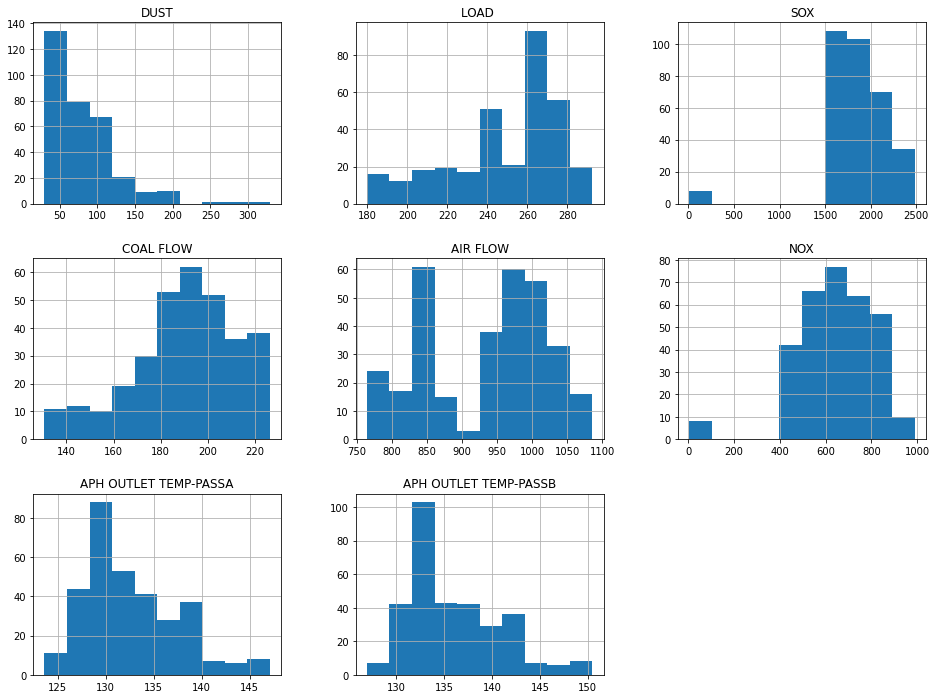

In [13]:
df.hist()

In [14]:
df

,DUST,LOAD,SOX,COAL FLOW,AIR FLOW,APH-A-inlet-O2,APH-B-inlet-O2,APH-A-outlet-O2,APH-B-outlet-O2,NOX,APH OUTLET TEMP-PASSA,APH OUTLET TEMP-PASSB
1,90.80,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.952588,669.0,128.827459,131.418488
2,44.00,193.337067,1905.0,139.956100,782.0,4.643019,4.294496,5.754969,5.510434,782.0,129.108368,132.330617
3,44.90,191.797440,1866.0,139.279434,773.0,4.615278,4.364353,5.611253,5.564438,758.0,132.004634,134.760106
4,40.12,191.705933,1870.0,140.341476,768.0,4.522539,4.274601,5.575839,5.455734,740.0,131.639511,134.136602
5,40.00,190.005066,1887.0,141.173676,768.0,4.230556,4.113577,5.336401,5.344364,754.0,131.172384,133.700633
...,...,...,...,...,...,...,...,...,...,...,...,...
319,202.00,280.991913,1602.0,224.756393,1058.0,2.609954,2.855597,3.70673,3.681844,620.0,147.120422,150.316071
320,202.00,281.414917,1602.0,224.468277,1065.0,2.553551,2.744499,3.681642,3.663613,620.0,146.625107,149.817220
321,252.00,275.979797,1602.0,225.046463,1053.0,2.936583,2.922196,3.923084,3.90895,620.0,146.369191,149.502660
322,299.00,276.770416,1602.0,224.916992,1047.0,2.883361,2.909387,4.035063,3.843487,620.0,146.193136,149.266301


In [15]:
df.dtypes

DUST                     float64
LOAD                     float64
SOX                      float64
COAL FLOW                float64
AIR FLOW                 float64
APH-A-inlet-O2            object
APH-B-inlet-O2            object
APH-A-outlet-O2           object
APH-B-outlet-O2           object
NOX                      float64
APH OUTLET TEMP-PASSA    float64
APH OUTLET TEMP-PASSB    float64
dtype: object

In [16]:
df['APH-A-inlet-O2']=df['APH-A-inlet-O2'].astype(float)

In [17]:
df['APH-B-inlet-O2']=df['APH-B-inlet-O2'].astype(float)
df['APH-A-outlet-O2']=df['APH-A-outlet-O2'].astype(float)
df['APH-B-outlet-O2']=df['APH-A-outlet-O2'].astype(float)

In [18]:
df.dtypes

DUST                     float64
LOAD                     float64
SOX                      float64
COAL FLOW                float64
AIR FLOW                 float64
APH-A-inlet-O2           float64
APH-B-inlet-O2           float64
APH-A-outlet-O2          float64
APH-B-outlet-O2          float64
NOX                      float64
APH OUTLET TEMP-PASSA    float64
APH OUTLET TEMP-PASSB    float64
dtype: object

In [19]:
x=df.drop(columns=['NOX'])
y = df['NOX']

In [20]:
x

,DUST,LOAD,SOX,COAL FLOW,AIR FLOW,APH-A-inlet-O2,APH-B-inlet-O2,APH-A-outlet-O2,APH-B-outlet-O2,APH OUTLET TEMP-PASSA,APH OUTLET TEMP-PASSB
1,90.80,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.774693,128.827459,131.418488
2,44.00,193.337067,1905.0,139.956100,782.0,4.643019,4.294496,5.754969,5.754969,129.108368,132.330617
3,44.90,191.797440,1866.0,139.279434,773.0,4.615278,4.364353,5.611253,5.611253,132.004634,134.760106
4,40.12,191.705933,1870.0,140.341476,768.0,4.522539,4.274601,5.575839,5.575839,131.639511,134.136602
5,40.00,190.005066,1887.0,141.173676,768.0,4.230556,4.113577,5.336401,5.336401,131.172384,133.700633
...,...,...,...,...,...,...,...,...,...,...,...
319,202.00,280.991913,1602.0,224.756393,1058.0,2.609954,2.855597,3.706730,3.706730,147.120422,150.316071
320,202.00,281.414917,1602.0,224.468277,1065.0,2.553551,2.744499,3.681642,3.681642,146.625107,149.817220
321,252.00,275.979797,1602.0,225.046463,1053.0,2.936583,2.922196,3.923084,3.923084,146.369191,149.502660
322,299.00,276.770416,1602.0,224.916992,1047.0,2.883361,2.909387,4.035063,4.035063,146.193136,149.266301


In [21]:
x.to_csv('final_data')

# VIF

In [162]:
names = list(df.columns)
names

['DUST',
 'LOAD ',
 'SOX',
 'COAL FLOW',
 'AIR FLOW',
 'APH-A-inlet-O2',
 'APH-B-inlet-O2',
 'APH-A-outlet-O2',
 'APH-B-outlet-O2',
 'NOX',
 'APH OUTLET TEMP-PASSA',
 'APH OUTLET TEMP-PASSB']

In [163]:
for i in range(0, len(names)):
    x=df.drop(columns=['NOX'])
    y = df['NOX']
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of DUST column is 0.99 keeping all other columns as features
Variance Inflation Factor of DUST column is 73.92 

R Square value of LOAD  column is 0.99 keeping all other columns as features
Variance Inflation Factor of LOAD  column is 73.92 

R Square value of SOX column is 0.99 keeping all other columns as features
Variance Inflation Factor of SOX column is 73.92 

R Square value of COAL FLOW column is 0.99 keeping all other columns as features
Variance Inflation Factor of COAL FLOW column is 73.92 

R Square value of AIR FLOW column is 0.99 keeping all other columns as features
Variance Inflation Factor of AIR FLOW column is 73.92 

R Square value of APH-A-inlet-O2 column is 0.99 keeping all other columns as features
Variance Inflation Factor of APH-A-inlet-O2 column is 73.92 

R Square value of APH-B-inlet-O2 column is 0.99 keeping all other columns as features
Variance Inflation Factor of APH-B-inlet-O2 column is 73.92 

R Square value of APH-A-outlet-O2 column is 0.

# FEATURE SELECTION

In [164]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [166]:
print(model.feature_importances_)

[0.08830267 0.08546064 0.11403861 0.09190919 0.08838902 0.08443109
 0.08750702 0.08577921 0.08211755 0.09632027 0.09574473]


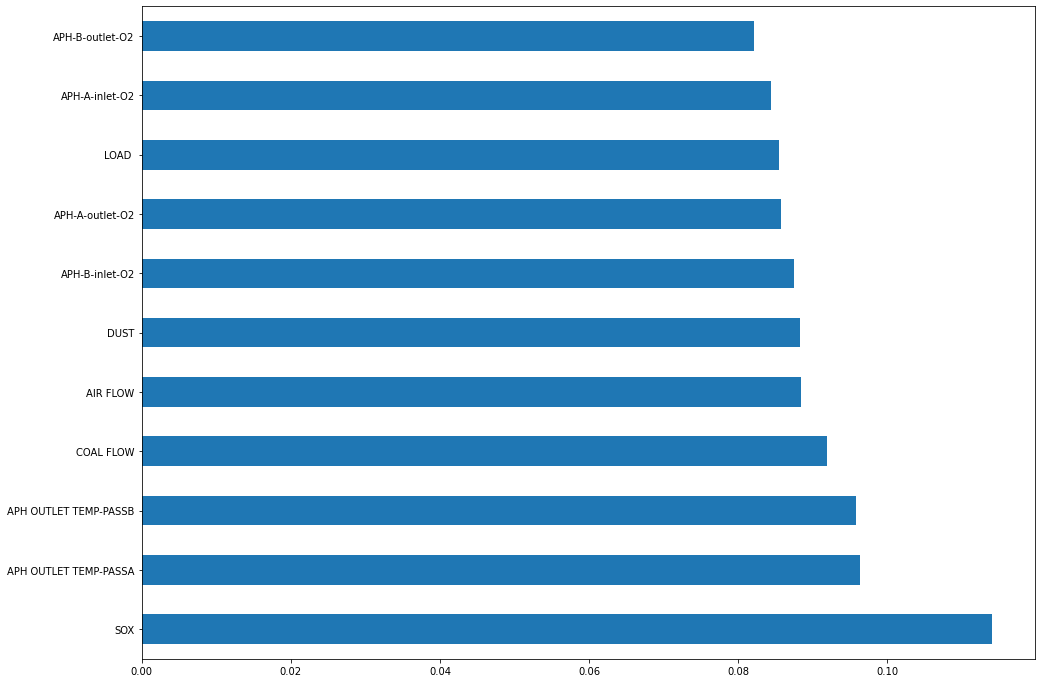

In [170]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

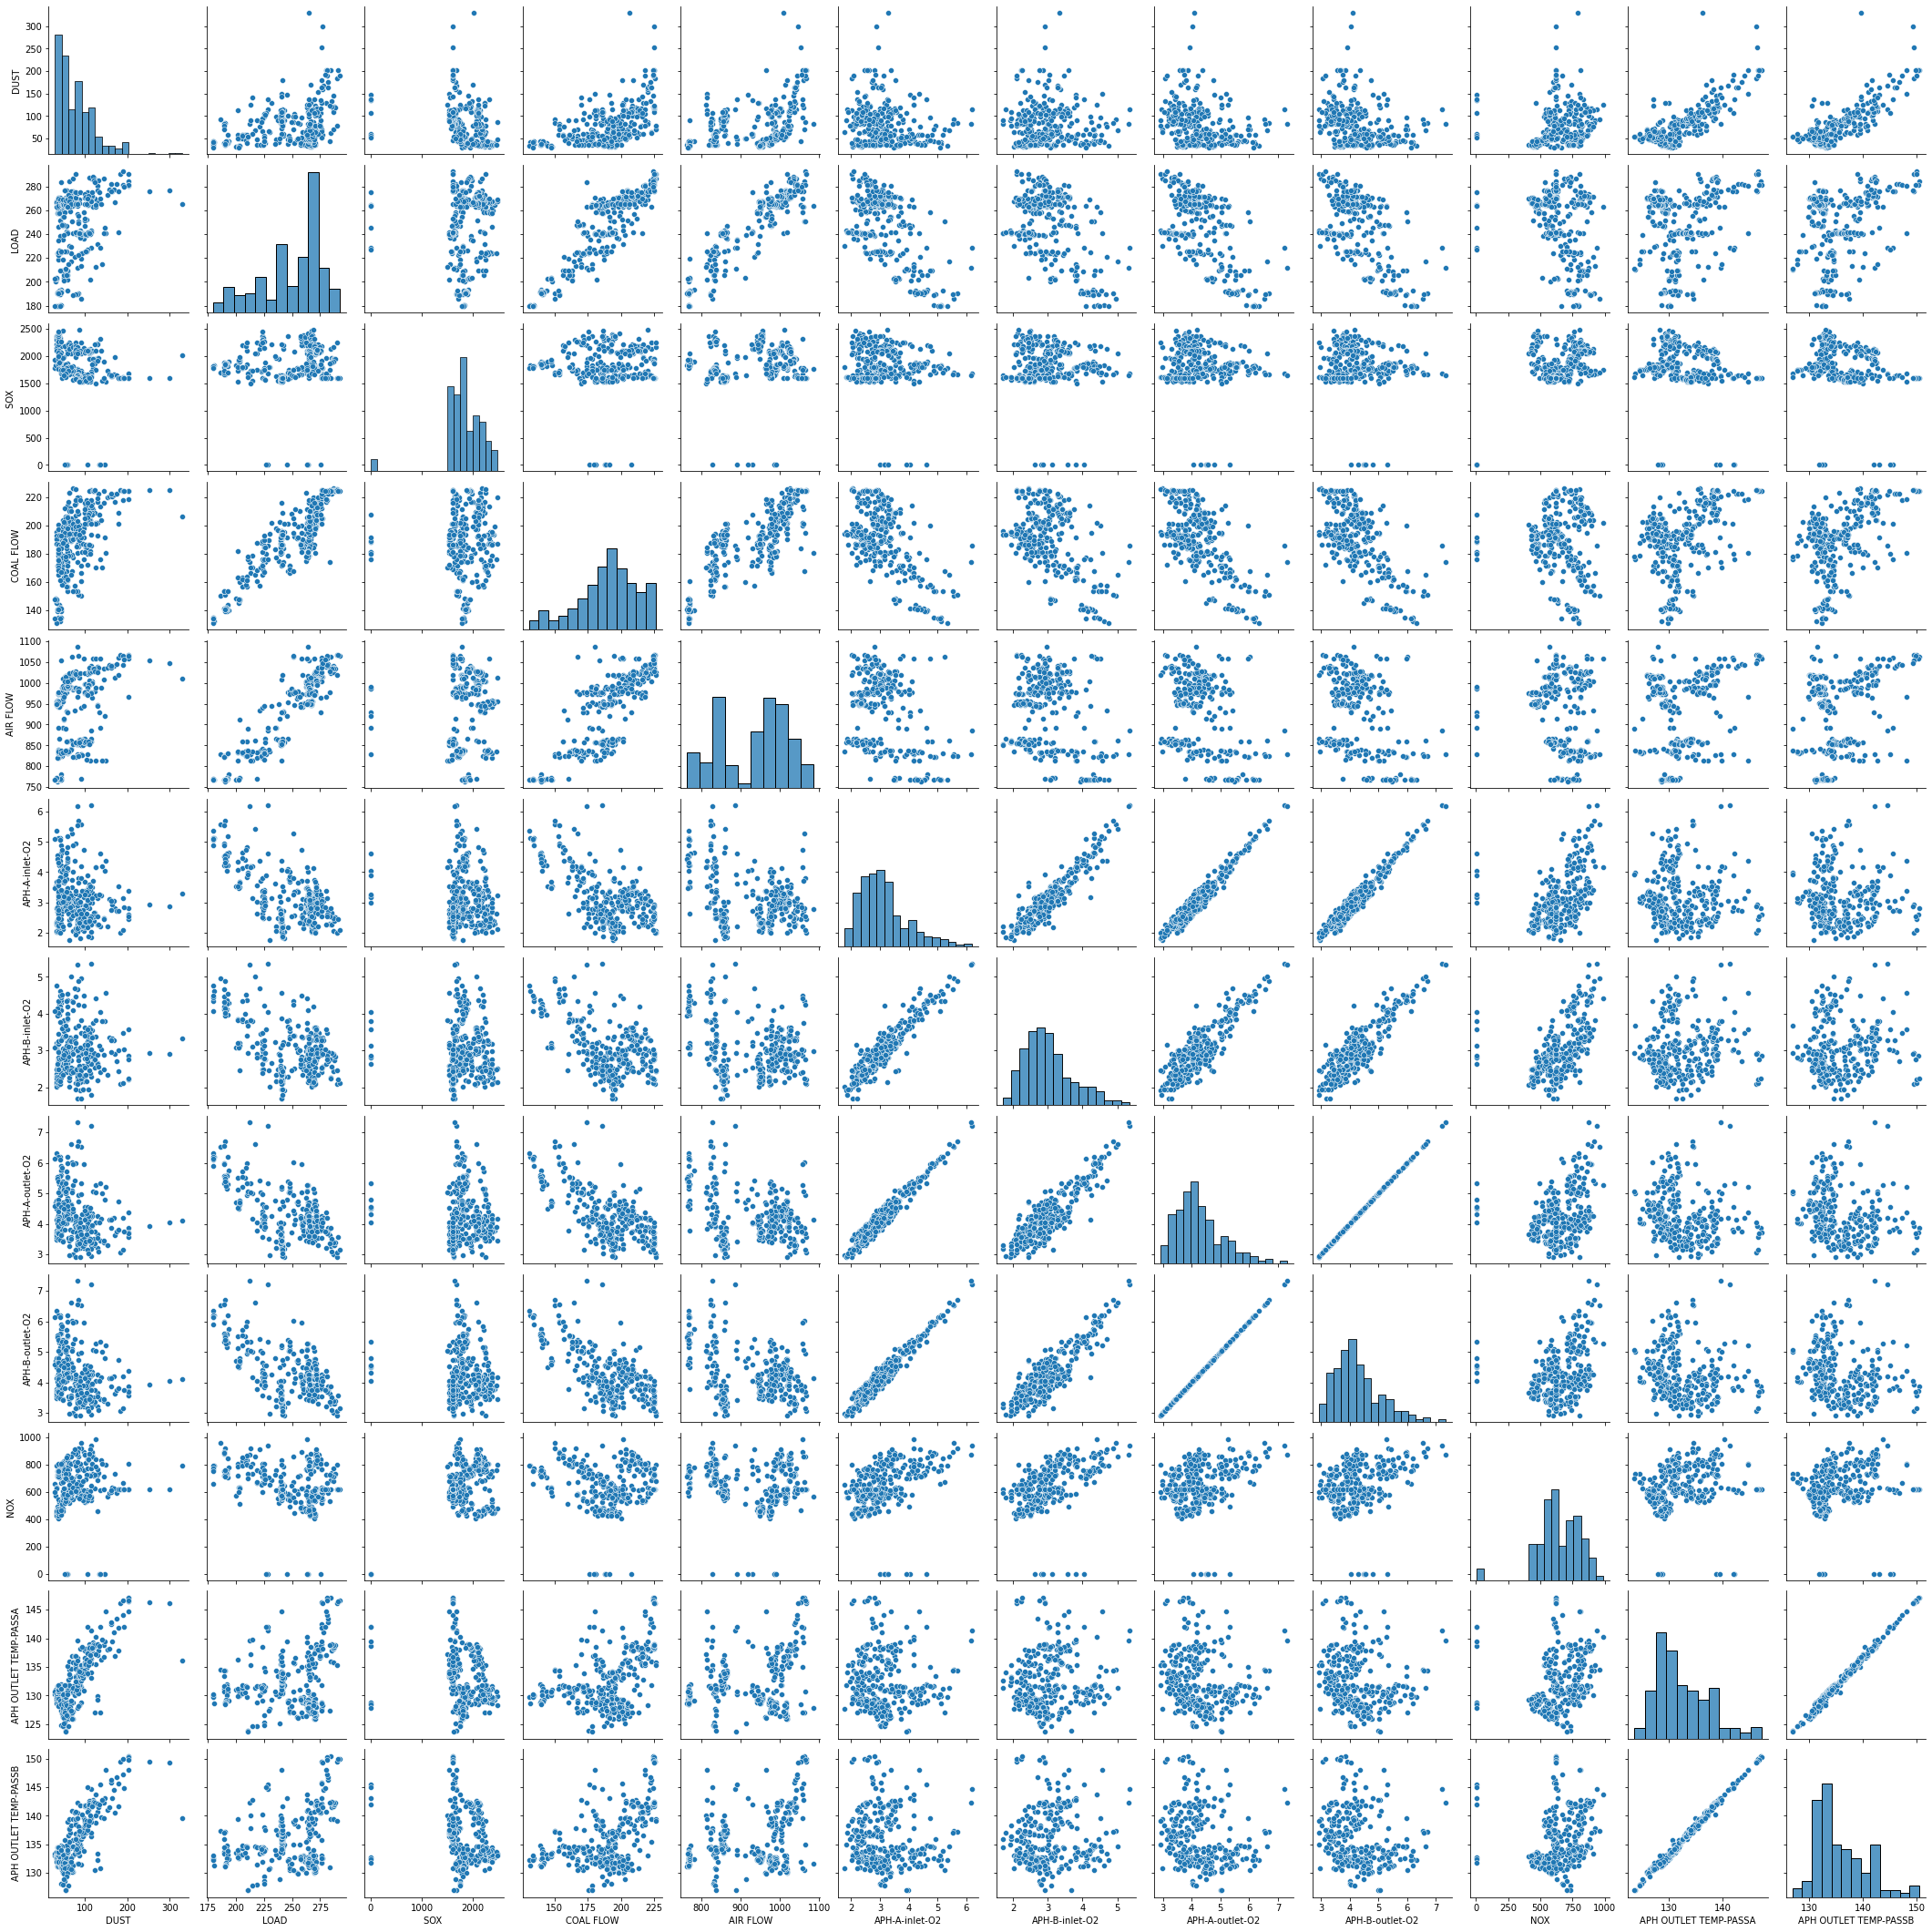

In [99]:
sns.pairplot(df)

In [122]:
df.shape

(323, 13)

# CHI Square TEST

In [126]:
X=df.drop(columns=['NOX'])
y = df['NOX']

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [172]:
ordered_rank_features=SelectKBest(score_func=chi2,k=11)
ordered_feature=ordered_rank_features.fit(x,y)

In [173]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x.columns)

In [174]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [175]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,DUST,6359.251217
1,LOAD,762.914456
2,SOX,23719.403931
3,COAL FLOW,649.175161
4,AIR FLOW,1976.623422
5,APH-A-inlet-O2,59.231546
6,APH-B-inlet-O2,45.282435
7,APH-A-outlet-O2,39.530250
8,APH-B-outlet-O2,39.530250
9,APH OUTLET TEMP-PASSA,43.872426


In [97]:
df.corr()['NOX']

DUST                     0.151058
LOAD                    -0.259904
SOX                      0.510797
COAL FLOW               -0.069260
AIR FLOW                -0.129065
APH-A-inlet-O2           0.405271
APH-B-inlet-O2           0.495870
APH-A-outlet-O2          0.298324
APH-B-outlet-O2          0.298324
NOX                      1.000000
APH OUTLET TEMP-PASSA    0.246390
APH OUTLET TEMP-PASSB    0.230313
Name: NOX, dtype: float64

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX', ylabel='Density'>

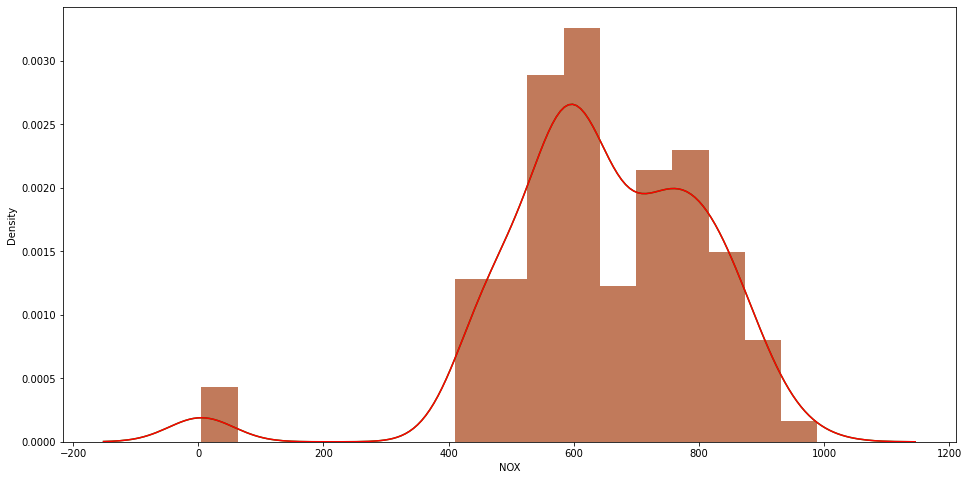

In [94]:
plt.figure(figsize = (16,8))
sns.distplot(df["NOX"], color = 'g')
sns.distplot(df["NOX"], color = 'r')

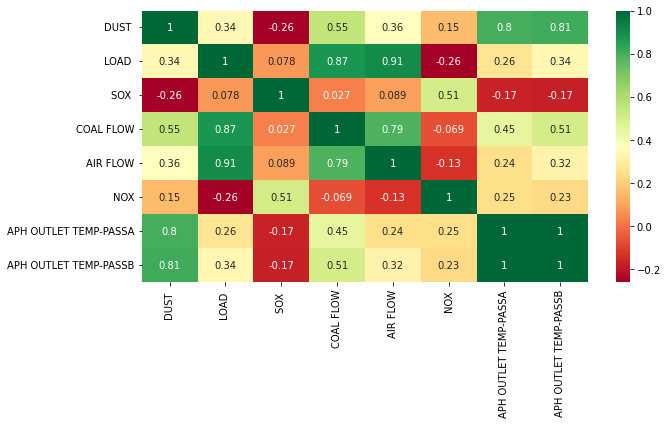

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

In [189]:
profile = ProfileReport(df)

In [192]:
profile.to_file('MY_Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [180]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [181]:
models={
    'Linear Regression': LinearRegression(),
    'Linear Regression(Ridge)': Ridge(),
    'Linear Regression(lasso)': Lasso(),
    'Support vector Regression': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

In [183]:
for model_name,model in models.items():
    model.fit(x_train, y_train)
    print(model_name,'trained')



Linear Regression trained
Linear Regression(Ridge) trained


C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.755e+05, tolerance: 6.291e+02
  model = cd_fast.enet_coordinate_descent(


Linear Regression(lasso) trained
Support vector Regression trained
DecisionTreeRegressor trained
Random Forest Regressor trained


In [186]:
for model_name,model in models.items():
    
    print(model_name)
    print("Train Scores")
    adj_r2 = 1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_train, y_train)))
    
    print("Test Scores")
    adj_r2 = 1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_test, y_test)))

    print("_______________________________")

Linear Regression
Train Scores
    Accuracy Score: 0.79
    r2: 0.80
Test Scores
    Accuracy Score: 0.70
    r2: 0.74
_______________________________
Linear Regression(Ridge)
Train Scores
    Accuracy Score: 0.78
    r2: 0.80
Test Scores
    Accuracy Score: 0.71
    r2: 0.74
_______________________________
Linear Regression(lasso)
Train Scores
    Accuracy Score: 0.78
    r2: 0.79
Test Scores
    Accuracy Score: 0.71
    r2: 0.74
_______________________________
Support vector Regression
Train Scores
    Accuracy Score: -0.05
    r2: 0.00
Test Scores
    Accuracy Score: -0.13
    r2: -0.00
_______________________________
DecisionTreeRegressor
Train Scores
    Accuracy Score: 1.00
    r2: 1.00
Test Scores
    Accuracy Score: 0.76
    r2: 0.79
_______________________________
Random Forest Regressor
Train Scores
    Accuracy Score: 0.98
    r2: 0.99
Test Scores
    Accuracy Score: 0.91
    r2: 0.92
_______________________________


In [193]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [195]:
model.fit(x_train,y_train )

RandomForestRegressor()

In [200]:
import pickle
pickle.dump(model,open('nox_model.pkl','wb'))

In [202]:
model.predict([[90.8,219.169281,2058.0,160.247375,771.0,2.645082,2.914423,3.774693,3.774693,128.827459,131.418488]])

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([664.55])

In [205]:

with open('nox_model.pkl', 'rb') as f:
    x = pickle.load(f)

In [206]:
x

RandomForestRegressor()